Este proyecto consiste en realizar un análisis exploratorio a una base de datos que cuenta la librería Seaborn sobre pinguinos y sus distintas características

Importamos librerias a ocupar en el proyecto

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ssl
import scipy.stats


Cargamos los datos

In [2]:
ssl._create_default_https_context = ssl._create_unverified_context
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


1. Realizamos la primera estapa que es conocer y validar nuestros datos

Identificamos el tipo de dato que posee cada variable

In [3]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

Contamos cuantas variables hay por cada tipo de dato

In [4]:
df.dtypes.value_counts()

float64    4
object     3
dtype: int64

Vemos cuantas filas y columnas tiene el Dataframe

In [5]:
df.shape

(344, 7)

Vemos si existen columnas con valores nulos 

In [6]:
df.isnull().any()

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

Vemos cuantos valores nulos hay por columnas

In [7]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Sumamos el total de valores nulos 

In [8]:
df.isnull().sum().sum()

19

Graficamos la proporcion de valores nulos por cada variable

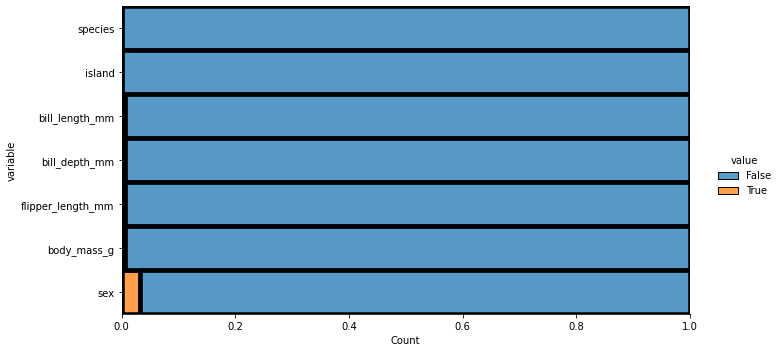

In [9]:
df.isnull().melt().pipe(
    lambda df:(
        sns.displot(
            data=df,
            y='variable',
            hue='value',
            multiple='fill',
            aspect=2
        )
    )
)

Ahora lo vemos por cada pinguino, para ver si quizás es un solo pinguino el que tiene mayores valores nulos

<AxesSubplot:>

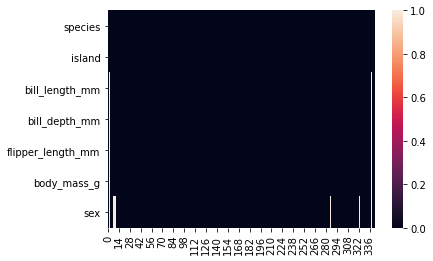

In [10]:
df.isnull().transpose().pipe(
    lambda df:(
        sns.heatmap(
            data=df
        )
    )
)

Como son pocos los valores nulos en este caso lo mejor es eliminar esos valores

In [11]:
df_limpio = df.dropna()
df_limpio.isnull().sum()


species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

2. Exploramos nuestras variables categóricas

Acá verenos los estadiscos de todo el conjunto de datos

In [12]:
df_limpio.describe(include='all')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
count,333,333,333.000000,333.000000,333.000000,333.000000,333
unique,3,3,NaN,NaN,NaN,NaN,2
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,Male
freq,146,163,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.992793,17.164865,200.966967,4207.057057,NaN
std,NaN,NaN,5.468668,1.969235,14.015765,805.215802,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.500000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.500000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.600000,18.700000,213.000000,4775.000000,NaN


Si queremos ver solo los estadisticos de las variables numéricas

In [13]:
df_limpio.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


Si queremos ver los estadísticos solo de las variables categóricas

In [14]:
df_limpio.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,Male
freq,146,163,168


Ahora podemos graficar el conteo de las especies mediante dos maneras

<AxesSubplot:>

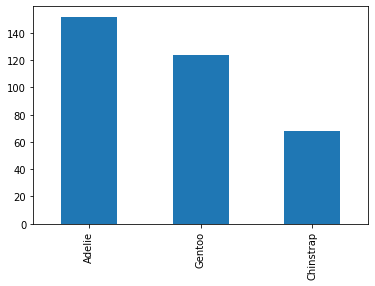

In [15]:
df.species.value_counts().plot(kind='bar')

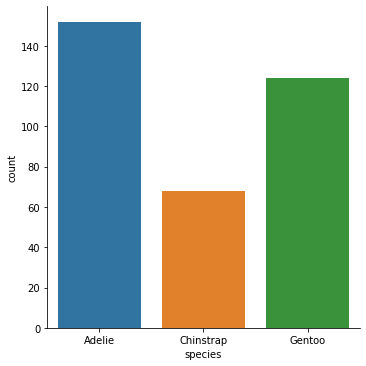

In [16]:
sns.catplot(data=df,x='species',kind='count')

Si queremos ver la proporción de forma gráfica

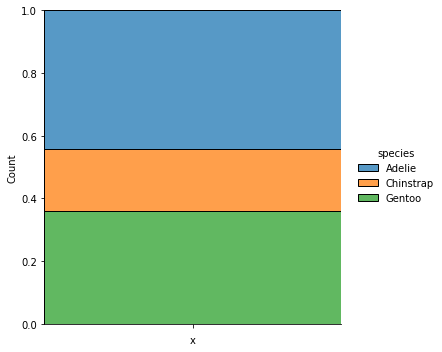

In [17]:
df['x'] = ''  
sns.displot(data=df, x='x', hue='species', multiple='fill')
plt.show()

3. Medidas de Tendencia Central

La media

In [18]:
df.bill_depth_mm.mean()

17.151169590643278

In [19]:
df.mean()

bill_length_mm         43.921930
bill_depth_mm          17.151170
flipper_length_mm     200.915205
body_mass_g          4201.754386
dtype: float64

La mediana

In [20]:
df.median()

bill_length_mm         44.45
bill_depth_mm          17.30
flipper_length_mm     197.00
body_mass_g          4050.00
dtype: float64

La moda

In [21]:
df.mode()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,x
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,Male,


In [22]:
df.describe(include=object)

,species,island,sex,x
count,344,344,333,344
unique,3,3,2,1
top,Adelie,Biscoe,Male,
freq,152,168,168,344


4. Medidas de disperción y distribuciones

El máximo valor de las variables numericas

In [23]:
maximo = df.max(numeric_only=True)
print(maximo)

bill_length_mm         59.6
bill_depth_mm          21.5
flipper_length_mm     231.0
body_mass_g          6300.0
dtype: float64


El minimo valor de las varianbles numericas

In [24]:
minimo = df.min(numeric_only=True)
print(minimo)

bill_length_mm         32.1
bill_depth_mm          13.1
flipper_length_mm     172.0
body_mass_g          2700.0
dtype: float64


El rango

In [25]:
rango = maximo-minimo
print(rango)

bill_length_mm         27.5
bill_depth_mm           8.4
flipper_length_mm      59.0
body_mass_g          3600.0
dtype: float64


La desviación estandar

In [26]:
desv = df.std()
print(desv)

bill_length_mm         5.459584
bill_depth_mm          1.974793
flipper_length_mm     14.061714
body_mass_g          801.954536
dtype: float64


El rango intercuartilico

In [27]:
q75 = df.quantile(0.75)
q25 = df.quantile(0.25)
rango_int = q75-q25
print(rango_int)

bill_length_mm          9.275
bill_depth_mm           3.100
flipper_length_mm      23.000
body_mass_g          1200.000
dtype: float64


In [28]:
df.quantile(q=[0.75,0.50,0.25]).transpose()

,0.75,0.50,0.25
bill_length_mm,48.5,44.45,39.225
bill_depth_mm,18.7,17.30,15.600
flipper_length_mm,213.0,197.00,190.000
body_mass_g,4750.0,4050.00,3550.000


5. Distribución de las variables

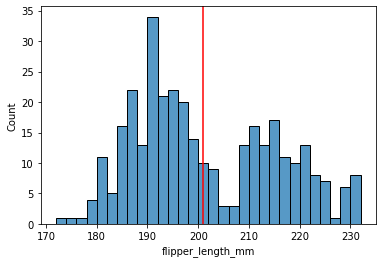

In [29]:
sns.histplot(data=df_limpio,
             x='flipper_length_mm',
             binwidth=2)

plt.axvline(x=df.flipper_length_mm.mean(),color='red')

Diagrama de caja / boxplot

<AxesSubplot:xlabel='flipper_length_mm'>

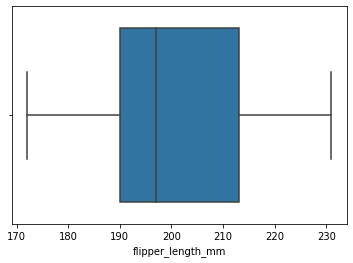

In [30]:
sns.boxplot(data=df,
            x='flipper_length_mm')

6. Análisis Bivariado

Gráfico de puntos

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

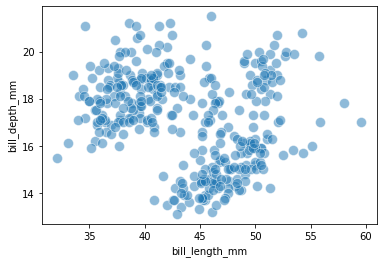

In [31]:
sns.scatterplot(data=df,
                x='bill_length_mm',
                y='bill_depth_mm',
                alpha = 1/2,
                s=100)

Histograma 2D

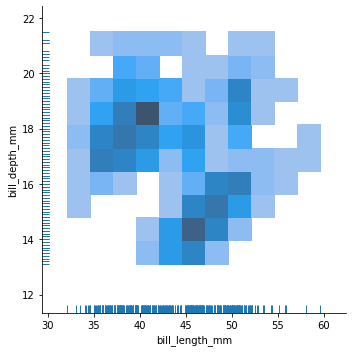

In [32]:
sns.displot(data=df,
            x='bill_length_mm',
            y='bill_depth_mm',
            rug=True)

Grafico de densidad

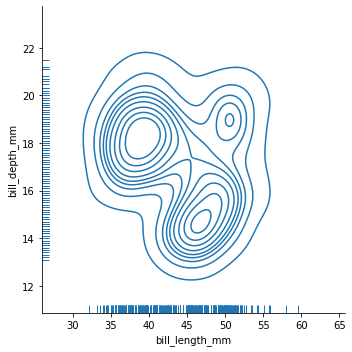

In [33]:
sns.displot(data=df,
            x='bill_length_mm',
            y='bill_depth_mm',
            rug=True,
            kind='kde')

Los tres graficos son distintas maneras de visualizar la misma información

Y por último podemos visualizar varios gráficos en la misma visual

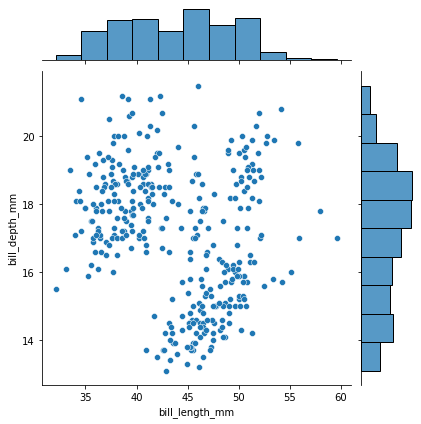

In [34]:
sns.jointplot(data=df,
            x='bill_length_mm',
            y='bill_depth_mm')

7. Relación entre una variable Categórica y Numérica

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

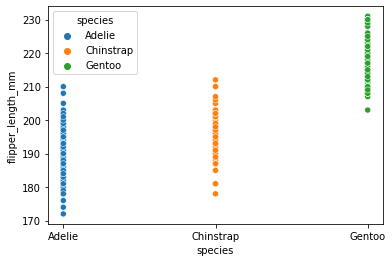

In [35]:
sns.scatterplot(data=df,
            x='species',
            y='flipper_length_mm',
            hue='species')

Agregandole un poco de ruido para poder visualizarlo de mejor manera

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

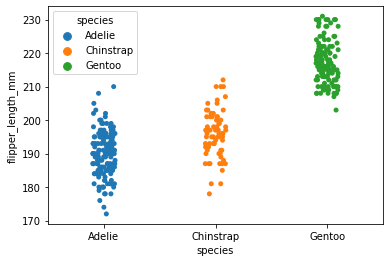

In [36]:
sns.stripplot(data=df,
            x='species',
            y='flipper_length_mm',
            hue='species')

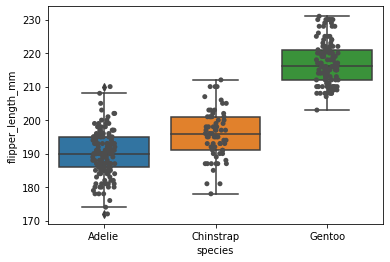

In [37]:
sns.boxplot(data=df,
            x='species',
            y='flipper_length_mm')

ax=sns.stripplot(data=df,
            x='species',
            y='flipper_length_mm',
            color=' .3')

<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

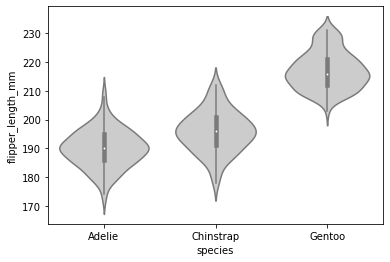

In [38]:
sns.violinplot(data=df,
            x='species',
            y='flipper_length_mm',
            color=' .8')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:1296: UserWarning: 6.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='species', ylabel='flipper_length_mm'>

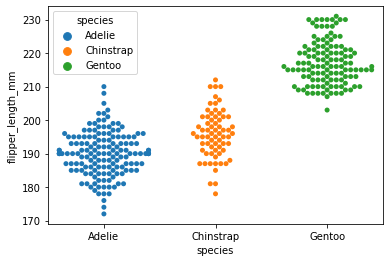

In [39]:
sns.swarmplot(data=df,
    x='species',
    y='flipper_length_mm',
    hue='species'
)

8. Correlación

In [40]:
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.235053,0.656181,0.595110
bill_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


<AxesSubplot:>

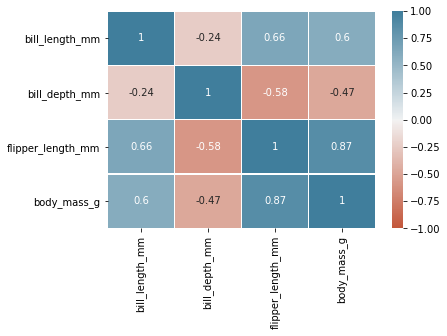

In [41]:
sns.heatmap(data=df.corr(),
            cmap=sns.diverging_palette(20,230,as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            annot=True)

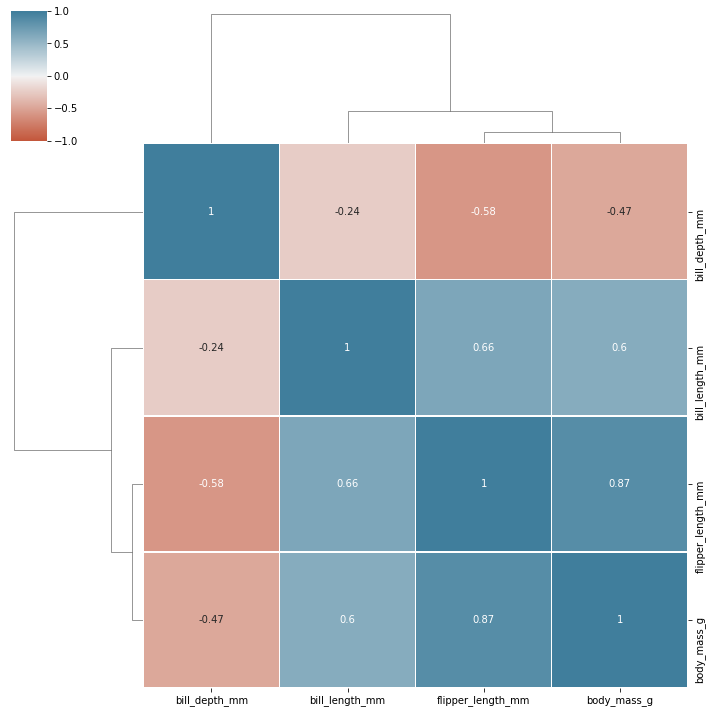

In [42]:
sns.clustermap(data=df.corr(),
            cmap=sns.diverging_palette(20,230,as_cmap=True),
            center=0,
            vmin=-1,
            vmax=1,
            linewidths=0.5,
            annot=True)

Regresión Lineal

Primero veremos como funciona, para esto crearemos 2 variables que sigan mas o menos una tendencia lineal y graficaremos

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

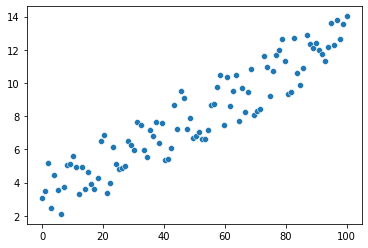

In [51]:
x_1 = np.linspace(0,100,100)
y_1 = 0.1 * x_1 + 3 +np.random.uniform(-2,2,size=x_1.size)
sns.scatterplot(x_1,y_1)

Ahora analizaremos los datos al aplicar una regresión lineal a las variables

In [52]:
res = scipy.stats.linregress(x=x_1, y=y_1)
print(res)

LinregressResult(slope=0.09809224763218723, intercept=3.067189929381252, rvalue=0.9348271234928704, pvalue=7.389365577535133e-46, stderr=0.0037639588915039054, intercept_stderr=0.21786034513106894)


El Slope es uno de los datos más importantes, ya que nos indica el efecto que tiene la correlación, en caso de que exista o en otras palabras que tanto cambia la variable y. Intercept nos indica donde corta en el eje Y. Rvalue nos inidica cuantos datos estamos capturando con la regresión lineal. Y el Pvalue nos indica si es significativa esta regresión.

Ahora lo veremos con nuestros datos

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

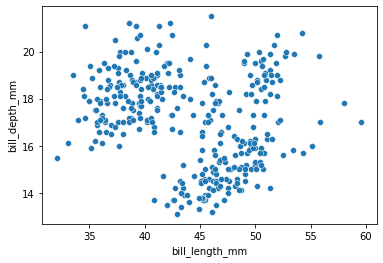

In [57]:
sns.scatterplot(data=df_limpio,
                x='bill_length_mm',
                y='bill_depth_mm')

In [58]:
res_penguins =scipy.stats.linregress(x=df_limpio.bill_length_mm, y=df_limpio.bill_depth_mm)
print(res_penguins)

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)


Podemos darnos cuenta que el Slope es negativo es decir la regresión tiene pendiente negativa, corta en 20 en el eje Y y el modelo solo capturaría un 23% de los datos.

Ahora lo veremos de forma gráfica, para esto debemos contruir la ecuación de la recta

LinregressResult(slope=-0.08232675339862285, intercept=20.786648668433827, rvalue=-0.22862563591302928, pvalue=2.528289720944277e-05, stderr=0.01926834673577886, intercept_stderr=0.8541730787409801)


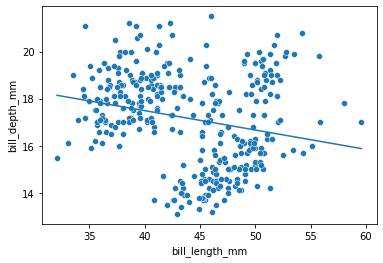

In [61]:
sns.scatterplot(data=df_limpio,
                x='bill_length_mm',
                y='bill_depth_mm')

res_penguins =scipy.stats.linregress(x=df_limpio.bill_length_mm, y=df_limpio.bill_depth_mm)
print(res_penguins)

fx_1 = np.array([df.bill_length_mm.min(),df.bill_length_mm.max()]) #Generamos los valores en x
fy_1 = res_penguins.intercept + res_penguins.slope * fx_1 # y = n + mx
plt.plot(fx_1,fy_1)

Existe otra forma mas sencilla con sns, pero sin tanto detalle a nivel de números, pero nos incluye un intervalo de confianza

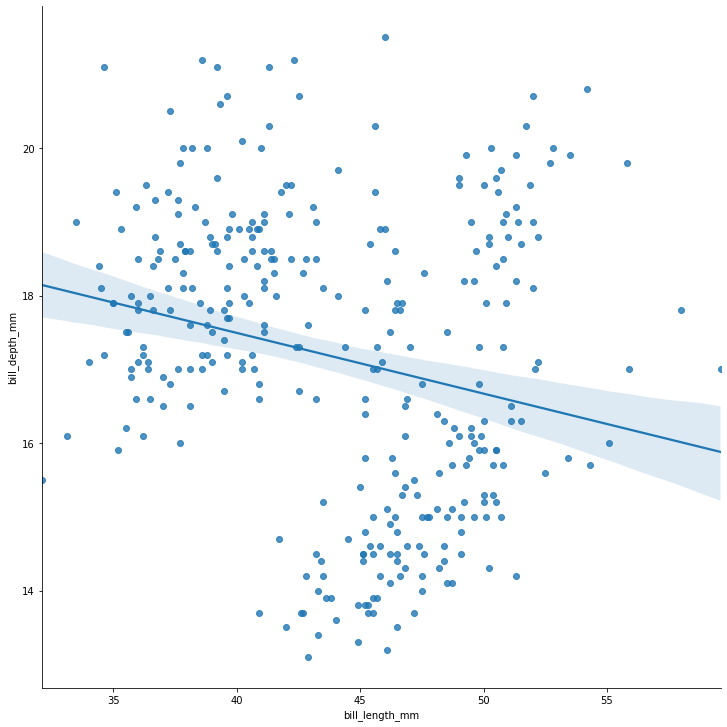

In [62]:
sns.lmplot(data=df_limpio,
           x='bill_length_mm',
           y='bill_depth_mm',
           height=10)

Por ultimo para concluir esto nos arroja que a mayor longitud de ala menos profundidad de pico, acá nos debemos preguntar si esto nos hace sentido y cuestionarnos los resultados

Por ejemplo haciendo alusión a la paradoja de Simpsons, fenomeno en el cual es posible concluir 2 cosas totalmente opuestas a partir de los mismos datos , dependeiendo de como se clasifiquen los datos. Acá incluiremos la variable especies y veremos que nos da una regresión completamente distinta (Positiva), pero que nos hace mucho mas sentido.

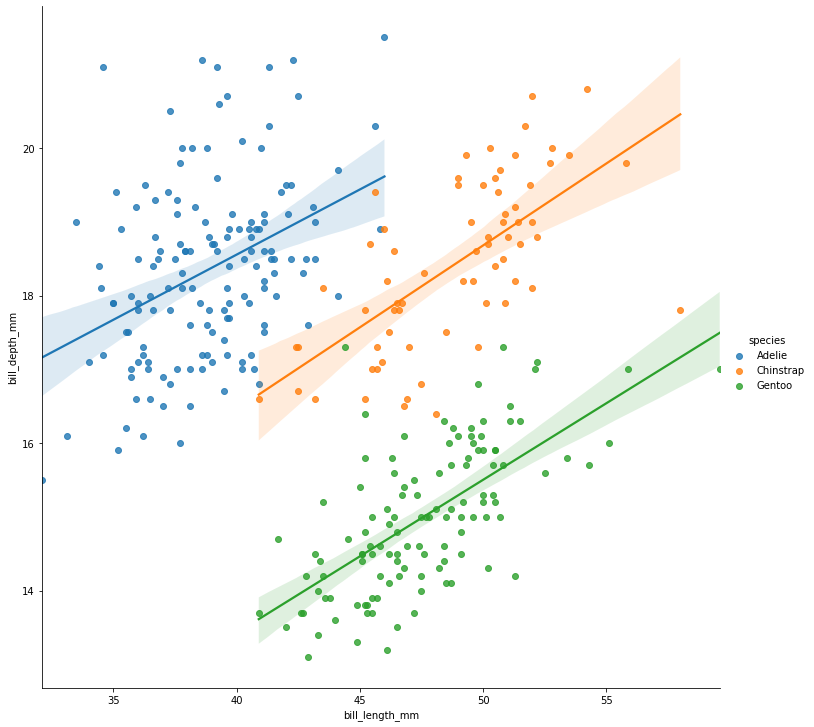

In [63]:
sns.lmplot(data=df_limpio,
           x='bill_length_mm',
           y='bill_depth_mm',
           height=10,
           hue='species')